# Spam ham prediction - NLP

### Importing packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
import string

In [10]:
import nltk

In [8]:
nltk.download_shell() # stopwords has been downloaded

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\ARUN\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


## Loading the dataset

In [12]:
messages = pd.read_csv("spamraw.csv")

## Exploratory Data Analysis

In [13]:
messages.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [15]:
messages.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [16]:
#checking for null values

In [17]:
messages.isnull().sum()

type    0
text    0
dtype: int64

<AxesSubplot:>

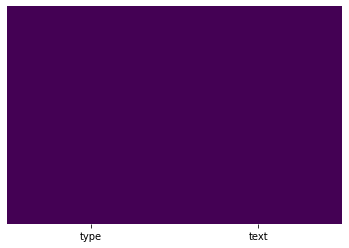

In [18]:
sns.heatmap(messages.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Thus we can see that there are no null values

In [23]:
#Adding an extra coloumn called length, denoting the length of messages

In [24]:
messages['length']=messages['text'].apply(len)

In [25]:
messages.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


<AxesSubplot:ylabel='Frequency'>

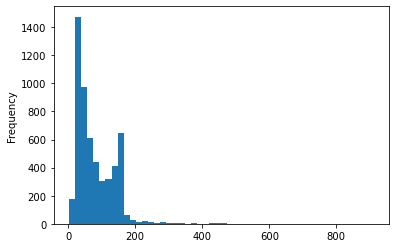

In [26]:
messages['length'].plot.hist(bins=50)

In [27]:
messages['length'].describe()

count    5559.000000
mean       79.781256
std        59.105270
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [28]:
#therefore the 910th message has the maximum length

In [31]:
messages[messages['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

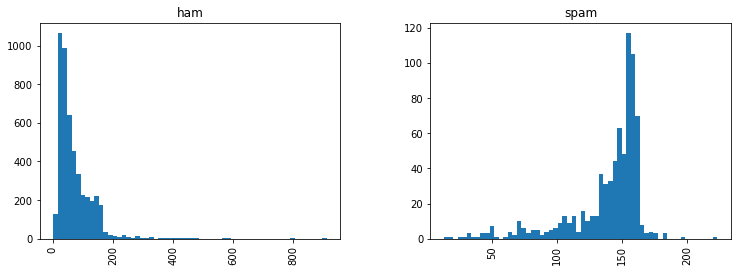

In [34]:
messages.hist(column='length',by='type',bins=60,figsize=(12,4))

## Data preprocessing for spam ham prediction

In [40]:
from nltk.corpus import stopwords

In [41]:
stopwords.words('english') #most common words in english not helpful for classifying

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [43]:
messages.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


In [44]:
#tokenization
messages['text'].head(5).apply(text_process)

0                         [Hope, good, week, checking]
1                                [Kgive, back, thanks]
2                                     [also, cbe, pay]
3    [complimentary, 4, STAR, Ibiza, Holiday, £1000...
4    [okmail, Dear, Dave, final, notice, collect, 4...
Name: text, dtype: object

#### importing classifiers and neccessary packages for prediction

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['text'],messages['type'],test_size=0.3)

#### importing CountVectorizer, Tfidf transformer and pipeline

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
from sklearn.pipeline import Pipeline

### Prediction using naive bayes classifier with the help of pipelines

In [53]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [54]:
#fitting the data

In [55]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FC8EE12790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predcitions

In [57]:
predictions = pipeline.predict(msg_test)

In [58]:
print(confusion_matrix(label_test,predictions))
print("\n")
print(classification_report(label_test,predictions))

[[1445    0]
 [  70  153]]


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1445
        spam       1.00      0.69      0.81       223

    accuracy                           0.96      1668
   macro avg       0.98      0.84      0.90      1668
weighted avg       0.96      0.96      0.95      1668



### Prediction using Random Forest Classifier with the help of pipelines

In [59]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier()),
])

In [60]:
#fitting the data

In [61]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FC8EE12790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

### Predictions

In [62]:
predictions = pipeline.predict(msg_test)

In [63]:
print(confusion_matrix(label_test,predictions))
print("\n")
print(classification_report(label_test,predictions))

[[1444    1]
 [  52  171]]


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1445
        spam       0.99      0.77      0.87       223

    accuracy                           0.97      1668
   macro avg       0.98      0.88      0.92      1668
weighted avg       0.97      0.97      0.97      1668

